In [1]:
#Stock Market (S&P 500) Sigma (standard deviation) Analysis
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1664114488677.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,09/23/2022,3693.23,--,3727.14,3727.14,3647.47
1,09/22/2022,3757.99,--,3782.36,3790.90,3749.45
2,09/21/2022,3789.93,--,3871.40,3907.07,3789.49
3,09/20/2022,3855.93,--,3875.23,3876.01,3827.54
4,09/19/2022,3899.89,--,3849.91,3900.45,3838.50
...,...,...,...,...,...,...
2542,10/01/2012,1444.49,--,1440.90,1457.14,1440.90
2543,09/28/2012,1440.67,--,1447.13,1447.13,1435.60
2544,09/27/2012,1447.15,--,1433.36,1450.20,1433.36
2545,09/26/2012,1433.32,--,1441.60,1441.60,1430.53


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2547.000000,2547.000000,2547.000000,2547.000000
mean,2667.848536,2645.484154,2659.322097,2630.307617
std,878.490539,921.183117,927.360047,914.147498
min,1353.330000,0.000000,0.000000,0.000000
25%,2010.835000,2002.060000,2016.240000,1991.575000
50%,2470.500000,2468.630000,2476.030000,2459.930000
75%,3113.680000,3111.485000,3123.850000,3094.030000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2516.000000,2516.000000,2516.000000,2516.000000
mean,2678.409455,2678.079547,2692.087989,2662.716017
std,878.249489,878.470366,884.507363,871.571810
min,1353.330000,1353.360000,1360.620000,1343.350000
25%,2018.717500,2017.610000,2024.622500,2005.045000
50%,2477.700000,2478.115000,2497.570000,2469.585000
75%,3120.852500,3128.337500,3137.830000,3108.270000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2546
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2516 non-null   object 
 1   Close/Last  2516 non-null   float64
 2   Volume      2516 non-null   object 
 3   Open        2516 non-null   float64
 4   High        2516 non-null   float64
 5   Low         2516 non-null   float64
dtypes: float64(4), object(2)
memory usage: 137.6+ KB


In [5]:
df.shape

(2516, 6)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

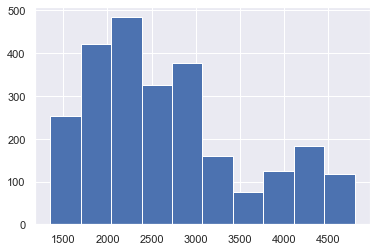

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

3693.23

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

2678.4094554849066

In [10]:
close_sd = df['Close/Last'].std()
close_sd

878.2494891901752

In [11]:
sigma1 = close_mean + close_sd
sigma1

3556.658944675082

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

4434.908433865257

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

4874.033178460344

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2516 non-null   datetime64[ns]
 1   Close/Last  2516 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2012-09-25 to 2022-09-23')

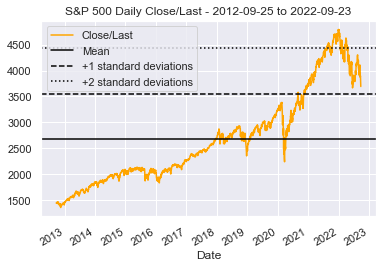

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2012-09-25 to 2022-09-23')

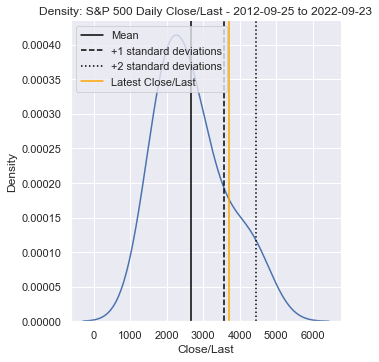

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

1.155503711651286

In [ ]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results